In [11]:
%matplotlib inline

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import HTML

In [13]:
flowdata = pd.read_pickle("./data/FlowData")
raindata = pd.read_pickle("./data/RainData")

# Hydropy-package

In [14]:
#Loading the hydropy package
import hydropy as hp

We have a Dataframe with river discharge at different locations in the Maarkebeek basin (Belgium):

In [15]:
HTML('<iframe src=http://biomath.ugent.be/~stvhoey/maarkebeek_data/ width=700 height=350></iframe>')

In [16]:
flowdata.head()

,L06_347,LS06_347,LS06_348,LS06_34C,LS06_34D,LS06_34E,LS06_34G
Time,,,,,,,
2008-01-01 00:15:00,0.229,0.229,0.021,0.122,0.014,0.030,NaN
2008-01-01 00:30:00,0.229,0.229,0.021,0.122,0.014,0.029,NaN
2008-01-01 00:45:00,0.229,0.229,0.021,0.122,0.014,0.029,NaN
2008-01-01 01:00:00,0.229,0.229,0.021,0.122,0.015,0.029,NaN
2008-01-01 01:15:00,0.229,0.229,0.021,0.122,0.015,0.029,NaN


In [17]:
flowdata.tail()

,L06_347,LS06_347,LS06_348,LS06_34C,LS06_34D,LS06_34E,LS06_34G
Time,,,,,,,
2013-01-01 23:00:00,0.883,0.883,0.075,NaN,0.119,0.034,NaN
2013-01-01 23:15:00,0.875,0.875,0.075,NaN,0.118,0.034,NaN
2013-01-01 23:30:00,0.872,0.872,0.074,NaN,0.119,0.034,NaN
2013-01-01 23:45:00,0.873,0.873,0.075,NaN,0.116,0.035,NaN
2013-01-02 00:00:00,0.860,0.860,0.075,NaN,0.114,0.036,NaN


In [18]:
print len(flowdata), 'records', 'from', flowdata.index[0], 'till', flowdata.index[-1]

175488 records from 2008-01-01 00:15:00 till 2013-01-02 00:00:00


Converting the dataframe to a hydropy time series datatype, provides extra functionalities:

In [19]:
myflowserie = hp.HydroAnalysis(flowdata)

### Select the summer of 2009:

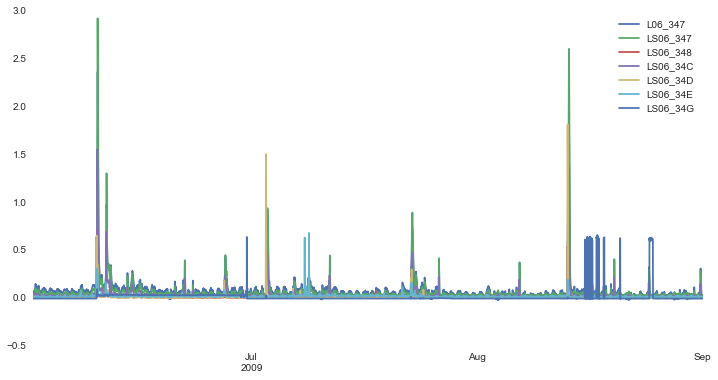

In [20]:
myflowserie.get_year('2009').get_season("Summer").plot(figsize=(12,6))

### Select all the months of June:

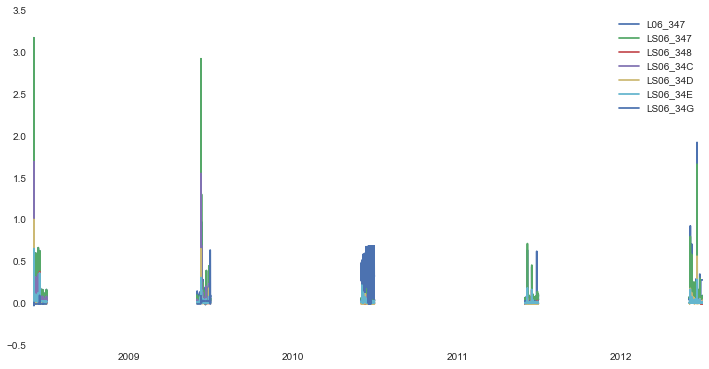

In [21]:
myflowserie.get_month("Jun").plot(figsize=(12,6))

### Select only the recession periods of the discharges (catchment drying) in June 2011:

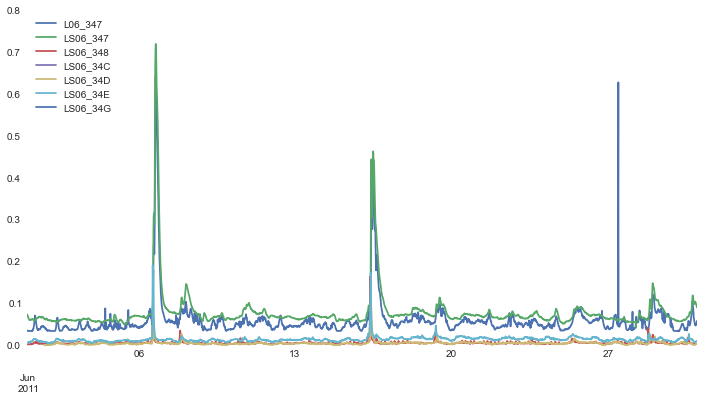

In [22]:
myflowserie.get_year('2011').get_month("Jun").plot(figsize=(12,6))  #TO ADD .get_recess()

### Peak values above the 90th percentile for the station LS06_347 in July 2010:

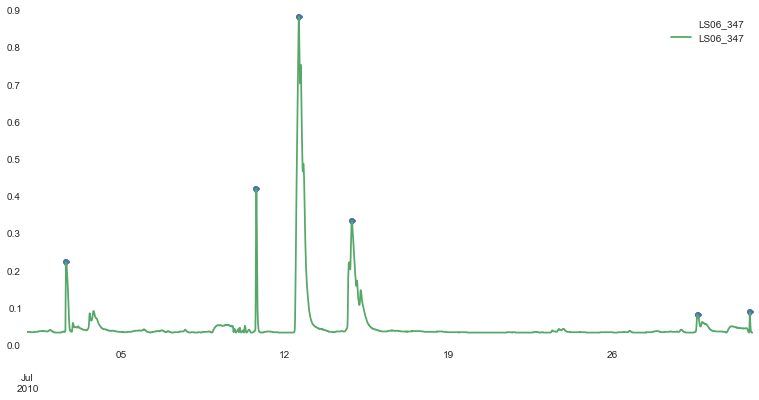

In [33]:
fig, ax = plt.subplots(figsize=(13, 6))
myflowserie['LS06_347'].get_year('2010').get_month("Jul").get_highpeaks(150, above_percentile=0.9).plot(style='o', ax=ax)
myflowserie['LS06_347'].get_year('2010').get_month("Jul").plot(ax=ax)

## Season averages (Pandas!)

In [41]:
myflowserie.data.groupby('season').mean()

,L06_347,LS06_347,LS06_348,LS06_34C,LS06_34D,LS06_34E,LS06_34G
season,,,,,,,
Autumn,0.238284,0.246378,0.022630,0.182139,0.026797,0.026666,0.017467
Spring,0.225966,0.239476,0.023696,0.144322,0.026558,0.029317,0.055004
Summer,0.097924,0.094836,0.012179,0.048987,0.012076,0.023207,0.136304
Winter,0.474153,0.480252,0.044169,0.219861,0.055192,0.034974,0.034519


## Goals

* Use the power of Python **Pandas**
* Provide **domain specific** (hydrological) functionalities
* Provide **intuitive** interface for hydrological time series (main focus on flow series)
* Combine different earlier written loose functionalities in **package**
* Independent, but useful in global **Phd**-developed framework: enables the user to quickly look at different properties of model behaviour

## Where?

* Code : https://github.com/stijnvanhoey/hydropy -->  **Fork** and contribute
* Documentation: https://github.ugent.be/pages/stvhoey/hydropy/index.html

### How to start?
1. Fork the github repo
2. Get the code on your computer

        git clone https://github.com/yourname/hydropy
3. Run the python setup script (install as development package):

        python setup.py develop
4. Improve implementation, add functionalities,...
    
    * Make a new branch
    * Make improvements on this branch
    * push the branch towards the repo and perform a push request

## Functionalities extended

In [42]:
import hydropy as hp
flowdata = pd.read_pickle("./data/FlowData")
raindata = pd.read_pickle("./data/RainData")
myflowserie = hp.HydroAnalysis(flowdata)

### Forwarding Pandas functionalities

In [43]:
# Data inspection
myflowserie.summary() #head(), tail(), 

,L06_347,LS06_347,LS06_348,LS06_34C,LS06_34D,LS06_34E,LS06_34G
count,175465.000000,172153.000000,163312.000000,104486.000000,174054.000000,171812.000000,93985.000000
mean,0.258319,0.264058,0.025398,0.148447,0.030074,0.028579,0.065588
std,0.730894,0.732851,0.047489,0.444993,0.079334,0.027651,0.156632
min,-0.020000,-0.019000,0.001000,-0.010000,0.000000,0.002000,0.000000
25%,0.059000,0.061000,0.009000,0.030000,0.008000,0.017000,0.000000
50%,0.107000,0.116000,0.013000,0.065000,0.014000,0.025000,0.000000
75%,0.240000,0.244000,0.025000,0.137000,0.028000,0.033000,0.001000
max,25.900000,25.900000,1.400000,13.800000,3.720000,1.650000,0.691000


In [24]:
# Resampling frequencies
temp1 = myflowserie.frequency_resample('7D', 'mean')  # 7 day means
temp1.head()

,L06_347,LS06_347,LS06_348,LS06_34C,LS06_34D,LS06_34E,LS06_34G,season
Time,,,,,,,,
2008-01-01 00:15:00,0.407740,0.407740,0.045302,0.218046,0.045960,0.039046,0.000877,Winter
2008-01-08 00:15:00,0.463927,0.463927,0.046653,0.247088,0.052054,0.043190,0.000057,Winter
2008-01-15 00:15:00,0.473644,0.473644,0.046685,0.252646,0.058049,0.041683,0.000124,Winter
2008-01-22 00:15:00,0.267629,0.267629,0.026110,0.142237,0.023388,0.032665,0.000004,Winter
2008-01-29 00:15:00,0.278516,0.278516,0.027170,0.148635,0.024737,0.035676,0.000009,Winter


In [25]:
temp2 = myflowserie.frequency_resample("M", "max")  # Monthly maxima
temp2.head()

,L06_347,LS06_347,LS06_348,LS06_34C,LS06_34D,LS06_34E,LS06_34G,season
Time,,,,,,,,
2008-01-31,1.730,1.730,0.312,0.924,0.452,0.164,0.006,Winter
2008-02-29,0.747,0.747,0.274,0.398,0.218,0.168,0.691,Winter
2008-03-31,7.430,7.430,0.879,3.960,1.260,0.829,0.018,Spring
2008-04-30,1.010,1.010,0.160,0.541,0.216,0.133,0.001,Spring
2008-05-31,0.427,0.427,0.075,0.228,0.069,0.106,0.691,Spring


In [26]:
temp3 = myflowserie.frequency_resample("A", 'sum')  # Yearly sums
temp3.head(6)

,L06_347,LS06_347,LS06_348,LS06_34C,LS06_34D,LS06_34E,LS06_34G,season
Time,,,,,,,,
2008-12-31,9053.371,9051.862,997.975,4826.749,939.998,1167.250,926.223,Winter
2009-12-31,7683.888,7672.038,859.617,4092.716,1036.323,1053.482,319.755,Winter
2010-12-31,11933.623,12356.573,906.725,6588.184,1294.821,1212.729,4918.342,Winter
2011-12-31,8458.819,8299.722,598.294,NaN,826.962,710.203,NaN,Winter
2012-12-31,8029.035,7910.918,771.414,3.002,1111.521,760.598,NaN,Winter
2013-12-31,167.232,167.232,13.726,NaN,24.894,5.903,NaN,None


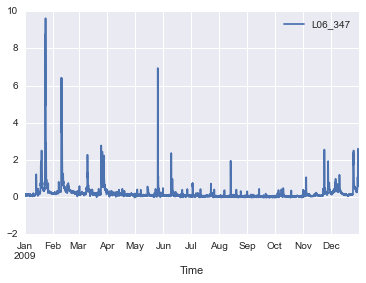

In [27]:
#slicing of the dataframes
myflowserie['L06_347']['2009'].plot()

### Easy period selection

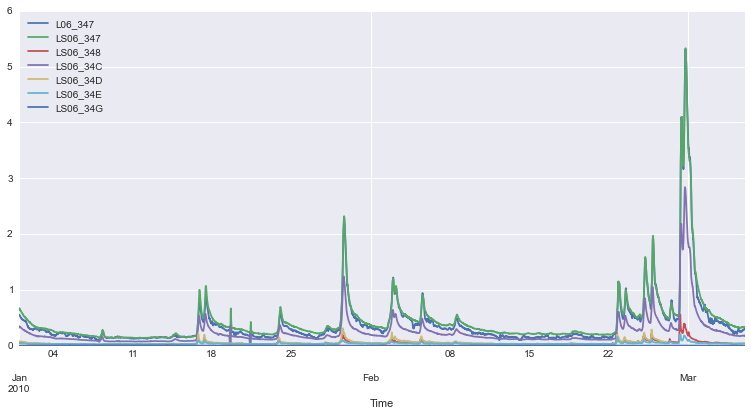

In [28]:
# get_month, get_year, get_season, get_date_range
myflowserie.get_date_range("01/01/2010","03/05/2010").plot(figsize=(13, 6))

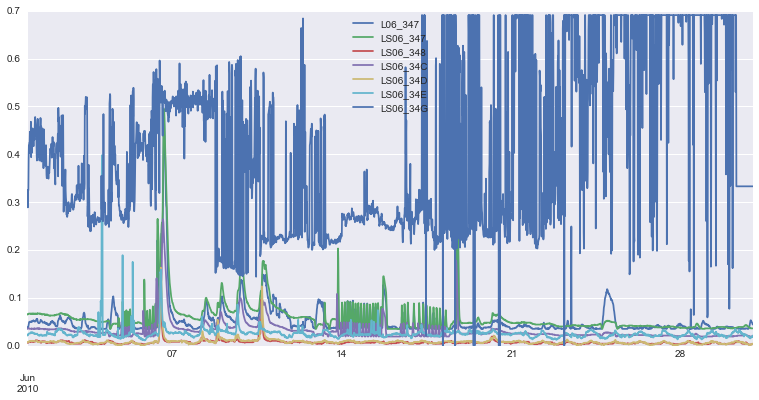

In [29]:
# or combine different statements:
myflowserie.get_year('2010').get_month(6).plot(figsize=(13, 6))

For the seasons some options are available: Meteorologic (first of the month) or astrologic (21st of the month)

In [30]:
myflowserie.current_season_dates()

{'Autumn': '0901', 'Spring': '0301', 'Summer': '0601', 'Winter': '1201'}

In [31]:
myflowserie.info_season_dates('north', 'astro')

{'Autumn': '0921', 'Spring': '0321', 'Summer': '0621', 'Winter': '1221'}

### 'Hydrological' selections

In [32]:
# Peaks (high or low)
myflowserie['LS06_348'].get_year('2012').get_highpeaks(60, above_percentile=0.8).data.dropna().head()

,LS06_348,season
Time,,
2012-01-01 23:15:00,0.199,Winter
2012-01-03 17:15:00,0.351,Winter
2012-01-04 23:45:00,0.415,Winter
2012-01-07 07:45:00,0.070,Winter
2012-01-09 10:45:00,0.031,Winter


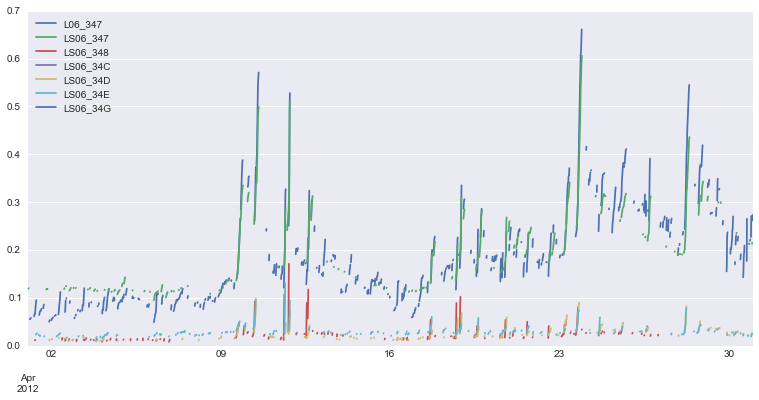

In [33]:
# Recessions and climbing periods  get_recess, get_climbing
myflowserie.get_year("2012").get_month("april").get_climbing().plot(figsize=(13, 6))

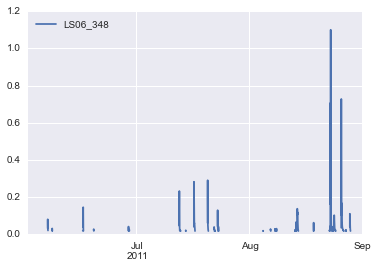

In [34]:
# above/below certain percentile values
myflowserie["LS06_348"].get_above_percentile(0.6).get_year('2011').get_season('summer').plot()

Furthermore:

* get_storms_per_year (in combination with rain-data)
* get_above_baseflow (in combination with baseflow-data)
* get_modes (driven, non-driven quick, non-driven slow)
* ...